In [0]:
import sklearn as sklearn

In [0]:
import os, sys
import pandas as pd
import numpy as np


#importing for plotting the graphs 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Download NLP Toolkit for 
import nltk 

#using Beautiful Soup for filtering Html tags
from bs4 import BeautifulSoup

# Import the stop word list and text data sets, including stop words
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer


In [0]:
# using crossvalidation for splitting data into training and test data
from sklearn  import model_selection
from sklearn.model_selection import train_test_split

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd /content/drive/My Drive/6thsem/UserReview

[Errno 2] No such file or directory: '/content/drive/My Drive/6thsem/UserReview'
/content


In [0]:
!ls

drive  sample_data


In [0]:
#Reading the dataset using the "read_csv" function to read the labeled data

data = pd.read_csv("/content/drive/My Drive/6thsem/Datascience_project/Amazon_Mobile.csv",header=0,error_bad_lines=False)

print (data.head())

                                        Product Name  ... Review Votes
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...  ...          1.0
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...  ...          0.0
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...  ...          0.0
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...  ...          0.0
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...  ...          0.0

[5 rows x 6 columns]


**There are 4410 phone models in this data set**

In [0]:
product_name = []
for item in data["Product Name"]:
    if (item in product_name):
        continue
    else:
        product_name.append(item)

print(len(product_name))

4410


**There are 385 brands in this data set.**

In [0]:
brands = []
for item in data["Brand Name"]:
    if (item in brands):
        continue
    else:
        brands.append(item)
        
print(len(brands))

385


In [0]:
data.shape

(413840, 6)

In [0]:
# data-cleaning and
# pre-processsing
amazondata_df = pd.DataFrame(data)

print(amazondata_df.head(10))

                                        Product Name  ... Review Votes
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...  ...          1.0
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...  ...          0.0
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...  ...          0.0
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...  ...          0.0
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...  ...          0.0
5  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...  ...          1.0
6  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...  ...          0.0
7  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...  ...          0.0
8  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...  ...          0.0
9  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...  ...          0.0

[10 rows x 6 columns]


In [0]:
import warnings
warnings.filterwarnings('ignore')

amazondata_df = amazondata_df[pd.notnull(amazondata_df['Reviews'])] 

amazondata_df['Review Votes'].replace("", 0, inplace=True )

# amazondata_df['Brand Name'] = amazondata_df.ix[~(amazondata_df['Brand Name'] == "")]

In [0]:
#check if we have any null reviews in our dataframe after the data cleaning
amazondata_df['Reviews'].isnull().any()

False

In [0]:
#reset_index to drop the existing index and replace with new index

amazondata_df.reset_index(drop=True, inplace=True)

In [0]:
#displaying the data with new index

print (amazondata_df.head(10))

                                        Product Name  ... Review Votes
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...  ...          1.0
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...  ...          0.0
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...  ...          0.0
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...  ...          0.0
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...  ...          0.0
5  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...  ...          1.0
6  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...  ...          0.0
7  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...  ...          0.0
8  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...  ...          0.0
9  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...  ...          0.0

[10 rows x 6 columns]


##### Top 10 brands in the data set sorted on the basis of sum of Ratings.

In [0]:
info = pd.pivot_table(amazondata_df,index=['Brand Name'],values=['Rating', 'Review Votes'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
info = info.sort_values(by=('sum', 'Rating'), ascending = False)
#np =numpy
#fill_value = Value to replace missing values with
info.head(100)

sum                   mean             
                       Rating Review Votes    Rating Review Votes
Brand Name                                                       
Samsung                260459        97620  3.962680     1.526099
BLU                    239843        58364  3.792224     0.951747
Apple                  228326       112255  3.924543     1.997953
LG                      86087        23044  3.841455     1.060323
Nokia                   64186        25963  3.819458     1.600185
...                       ...          ...       ...          ...
sony                      222           14  4.036364     0.264151
Thetford Marine           214          157  4.367347     3.340426
Generic                   210           39  3.088235     0.600000
Samsung international     209           15  4.265306     0.319149
indigi                    206           67  2.821918     0.971014

[100 rows x 4 columns]

#### CoRelation between price & rating

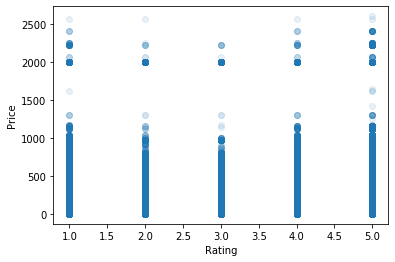

In [0]:
import matplotlib.pyplot as plt

ylabel = amazondata_df["Price"]
plt.ylabel("Price")
plt.xlabel("Rating")
xlabel = amazondata_df["Rating"]
plt.scatter(xlabel, ylabel, alpha=0.1)
plt.show()

#### CoRelation between Price and Review Votes

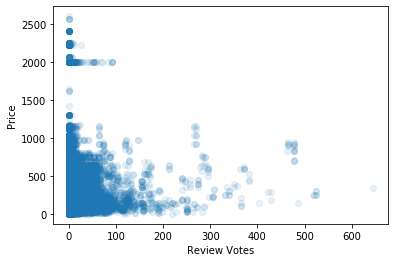

In [0]:
ylabel2 = amazondata_df["Price"]
plt.ylabel("Price")
xlabel2 = amazondata_df["Review Votes"]
plt.xlabel("Review Votes")
plt.scatter(xlabel2, ylabel2, alpha=0.1)
plt.show()

#### Strong co-relation between review votes and price.

#### CoRelation between Rating and Review Votes

In [0]:
corr_matrix = amazondata_df.corr()
corr_matrix["Rating"].sort_values(ascending = False)

Rating          1.000000
Price           0.074775
Review Votes   -0.050304
Name: Rating, dtype: float64

**It is observed that Rating has a NEGATIVE CORRELATION with Review Votes = -0.050303**

In [0]:
corr_matrix = amazondata_df.corr()
corr_matrix["Price"].sort_values(ascending = False)

Price           1.000000
Rating          0.074775
Review Votes    0.021867
Name: Price, dtype: float64

#### It is observed that Rating has a POSITIVE CORRELATION with Price = 0.073948

**Pridicting the user review about any mobile in dataset**

---



In [0]:
amazon_train, amazon_test =  model_selection.train_test_split(amazondata_df, test_size = .2, random_state=0)

In [0]:
import warnings
warnings.filterwarnings('ignore')

reviews_train = []

#converting all the data within the review column to string datatypes
amazon_train['Reviews'] = amazon_train['Reviews'].astype(str)


In [0]:
amazon_train.reset_index(drop=True, inplace=True)

In [0]:
#using BeautifulSoup to remove all the html tags that
for i in range (0,len(amazon_train)):
   reviews_train.append(BeautifulSoup(amazon_train["Reviews"][i],"lxml").get_text())

In [0]:
print(reviews_train[2])

Nice phone. I am waiting to be upgraded to Windows 10


#### NLTK function to find sentiment value and sentiment.

In [0]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def sentiment_value(paragraph):
    analyser = SentimentIntensityAnalyzer()
    result = analyser.polarity_scores(paragraph)
    score = result['compound']
    return round(score,1)

In [0]:
sample = amazon_train['Reviews'][40]
print(sample)
print('Sentiment: ')
print(sentiment_value(sample))

So far so good. I like it. The only thing that caused a little problem is I had to order a "nano" SIM card. I was not able to simply take my old SIM card out and insert it in the new phone. I will try and update several months from now...
Sentiment: 
0.7


In [0]:
all_sent_values = []
all_sentiments = []

In [0]:
nltk.download()


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [

True

In [0]:
#for i in range(0,about 300000+):
for i in range(0,len(amazon_train['Reviews'])): 
    all_sent_values.append(sentiment_value(reviews_train[i])) # 80 minutes for calculation
    

In [0]:
len(all_sent_values)

331022

In [0]:
#Sentiment Analysis on first 20,000 rows
temp_data = amazondata_df[0:len(amazon_train['Reviews'])]

#### Intervals
#### [ -1, -0.5) : 1, V.Negative
#### [-0.5, 0) : 2, Negative
#### [0] : 3, Neutral
#### (0, 0.5) : 4, Positive
#### [0.5, 1] : 5, V.Positive

In [0]:
SENTIMENT_VALUE = []
SENTIMENT = []
for i in range(0,len(amazon_train['Reviews'])):
    sent = all_sent_values[i]
    if (sent<=1 and sent>=0.5):
        SENTIMENT.append('V.Positive')
        SENTIMENT_VALUE.append(5)
    elif (sent<0.5 and sent>0):
        SENTIMENT.append('Positive')
        SENTIMENT_VALUE.append(4)
    elif (sent==0):
        SENTIMENT.append('Neutral')
        SENTIMENT_VALUE.append(3)
    elif (sent<0 and sent>=-0.5):
        SENTIMENT.append('Negative')
        SENTIMENT_VALUE.append(2)
    else:
        SENTIMENT.append('V.Negative')
        SENTIMENT_VALUE.append(1)
        
        

In [0]:
temp_data['SENTIMENT_VALUE'] = SENTIMENT_VALUE
temp_data['SENTIMENT'] = SENTIMENT

In [0]:
temp_data.head(10)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,SENTIMENT_VALUE,SENTIMENT
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,2,Negative
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,4,Positive
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,4,Positive
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,5,V.Positive
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,4,Positive
5,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,I already had a phone with problems... I know ...,1.0,5,V.Positive
6,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,The charging port was loose. I got that solder...,0.0,3,Neutral
7,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,"Phone looks good but wouldn't stay charged, ha...",0.0,1,V.Negative
8,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I originally was using the Samsung S2 Galaxy f...,0.0,3,Neutral
9,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,3,It's battery life is great. It's very responsi...,0.0,4,Positive


### Accuracy

In [0]:
#find accuracy
counter = 0
for i in range(0,len(amazon_train['Reviews'])):
    if (abs(temp_data['Rating'][i]-temp_data['SENTIMENT_VALUE'][i])>1):
        counter += 1
    
print(counter)

142479


#### 142479 occurences where Rating and Sentiment differ by more than 1.

In [0]:
accuracy = (temp_data.shape[0]-counter)/temp_data.shape[0]

percent_accuracy = accuracy*100

print(percent_accuracy)


56.95784570209835


#### 57% equal values of Rating and Sentiment Values (+/- 1)

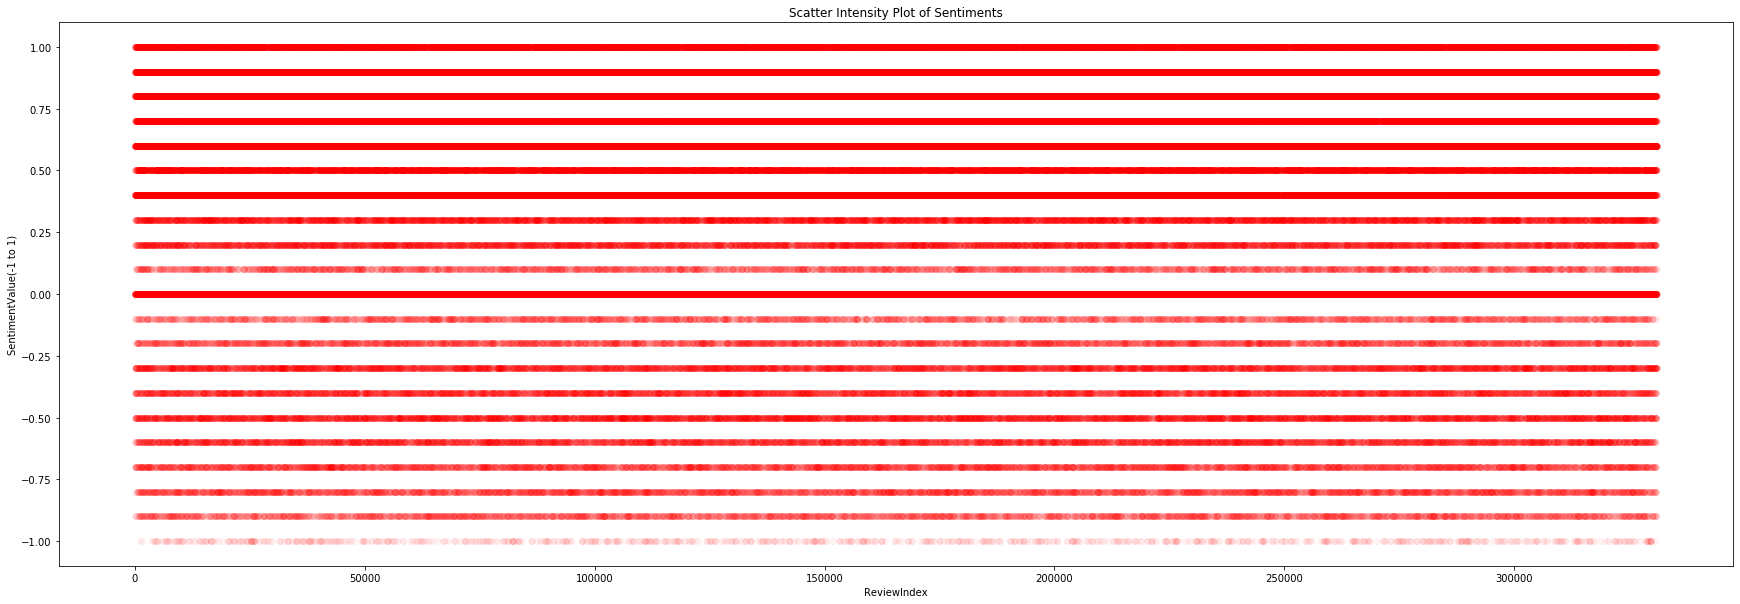

In [0]:
import pylab
xaxis = []
for i in range(0,len(amazon_train['Reviews'])):
    xaxis.append(i)

ylabel_new_1 = all_sent_values[:len(amazon_train['Reviews'])]

xlabel = xaxis
plt.figure(figsize=(30,10))
plt.xlabel('ReviewIndex')
plt.ylabel('SentimentValue(-1 to 1)')
plt.plot(xlabel, ylabel_new_1, 'ro',  alpha=0.04)

plt.title('Scatter Intensity Plot of Sentiments')
plt.show()

#### Observation: Sentiment variation is concentrated towards positivity.

In [0]:
product_name = []
for item in temp_data["Product Name"]:
    if (item in product_name):
        continue
    else:
        product_name.append(item)
        
len(product_name)

3318

#### 3318 diff product in the set.

In [0]:
testing2 = pd.pivot_table(temp_data,index=['Brand Name'],values=['Rating', 'Review Votes','SENTIMENT_VALUE'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
testing2 = testing2.sort_values(by=('sum', 'Rating'), ascending = False)
testing2.head(10)

sum               ...         mean                
            Rating Review Votes  ... Review Votes SENTIMENT_VALUE
Brand Name                       ...                             
BLU         233625        55000  ...     0.925832        3.954585
Apple       227816       111954  ...     1.996932        3.963392
Samsung      97876        41399  ...     1.723163        3.963908
LG           78693        21233  ...     1.073078        3.965232
Nokia        64162        25947  ...     1.599988        3.949098
BlackBerry   62931        20885  ...     1.270918        3.948634
Motorola     49888        22520  ...     1.781928        3.962167
HTC          43383        12472  ...     1.029978        3.973051
CNPGD        39176        20151  ...     1.638026        3.964957
OtterBox     35012         2268  ...     0.287817        3.941530

[10 rows x 6 columns]

#### Top 10 Brand names.
#### BLU
#### Apple
#### Samsung
#### LG
#### Nokia
#### BlackBerry
#### Motorola
#### HTC
#### CNPGD
#### OtterBox

#### Rating and Sentiment Value data are accurate with respect to each other.

In [0]:
#Top Phone Models

testing3 = pd.pivot_table(temp_data,index=['Product Name'],values=['Rating', 'Review Votes','SENTIMENT_VALUE'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
testing3 = testing3.sort_values(by=('sum', 'Rating'), ascending = False)
testing3.head(10)

sum  ...            mean
                                                   Rating  ... SENTIMENT_VALUE
Product Name                                               ...                
BLU Studio 5.0 C HD Unlocked Cellphone, Black        5030  ...        3.943049
Motorola Moto E (1st Generation) - Black - 4 GB...   4980  ...        3.973381
Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP ...   4962  ...        4.021409
Motorola Moto E (1st Generation) - Black - 4 GB...   4664  ...        4.025544
OtterBox Iphone 5/5S/SE Defender Case w/ Drop a...   4488  ...        3.894597
Huawei Mate 2 - Factory Unlocked (Black)             4479  ...        3.988072
Apple iPhone 5s 32GB (Silver) - AT&T                 4460  ...        3.916816
Apple iPhone 5s AT&T Cellphone, 16GB, Silver         4267  ...        4.040741
BLU Energy X Plus Smartphone - With 4000 mAh Su...   4213  ...        3.960396
Apple MF259LL/A - iPhone 4s 8GB / 8MP Camera - ...   4175  ...        3.932956

[10 rows x 6 columns]

#### Sum and Mean Plots of Rating with Sentiments.

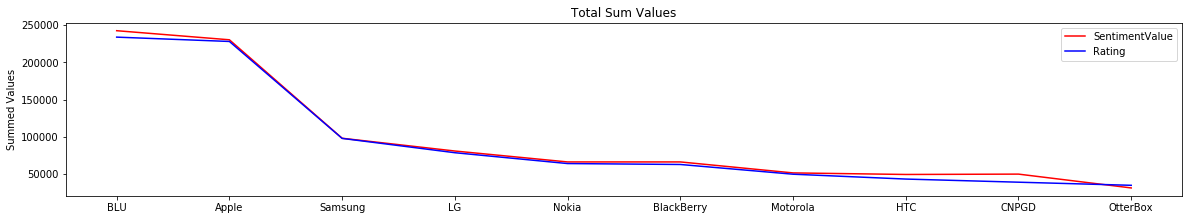

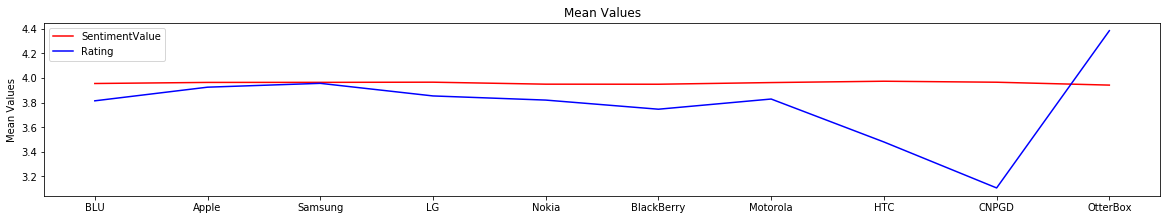

In [0]:
import pylab

names = testing2.index[:10]
y = testing2['sum', 'SENTIMENT_VALUE'][:10]
y2 = testing2['sum', 'Rating'][:10]


pylab.figure(figsize=(20,7))
x = range(10)
pylab.subplot(2,1,1)
pylab.xticks(x, names)
pylab.ylabel('Summed Values')
pylab.title('Total Sum Values')
pylab.plot(x,y,"r-",x,y2,'b-')
pylab.legend(['SentimentValue', 'Rating'])

y_new = testing2['mean', 'SENTIMENT_VALUE'][:10]
y2_new = testing2['mean', 'Rating'][:10]


pylab.figure(figsize=(20,7))


pylab.subplot(2,1,2)
pylab.xticks(x, names)
pylab.ylabel('Mean Values')
pylab.title('Mean Values')
pylab.plot(x,y_new,"r-",x,y2_new,'b-')
pylab.legend(['SentimentValue', 'Rating'])


pylab.show()

In [0]:
#Sentiment Analysis For Top 5 brands

blu = []
apple = []
samsung = []
lg = []
nokia = []



for i in range(0,len(amazon_train['Reviews'])):
    score = all_sent_values[i]
    brand = temp_data['Brand Name'][i]
    if (brand == 'BLU'):
        blu.append(score)
    elif (brand == 'Apple'):
        apple.append(score)
    elif (brand == 'Samsung'):
        samsung.append(score)
    elif (brand == 'LG'):
        lg.append(score)
    elif (brand == 'Nokia'):
        nokia.append(score)
    else:
        continue

In [0]:
list_of_brands = [blu,apple,samsung,lg,nokia]
name_of_brands = ['BLU', 'Apple', 'Samsung', 'LG', 'Nokia']

In [0]:
def plot_brand(brand, name):
    pylab.figure(figsize=(20,3))
    x = range(0,800)
    
    #pylab.xticks(x)
    pylab.ylabel('Sentiment')
    pylab.title(name)
    #pylab.plot(x,brand,"ro", alpha = 0.2)
    pylab.plot(x, brand[:800], color='#4A148C', linestyle='none', marker='o',ms=9, alpha = 0.4)
    
    pylab.show()

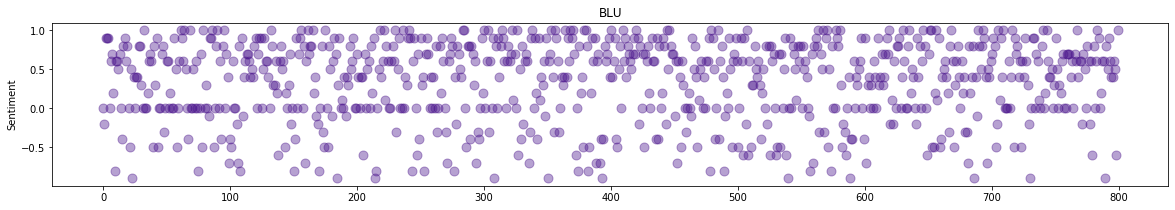

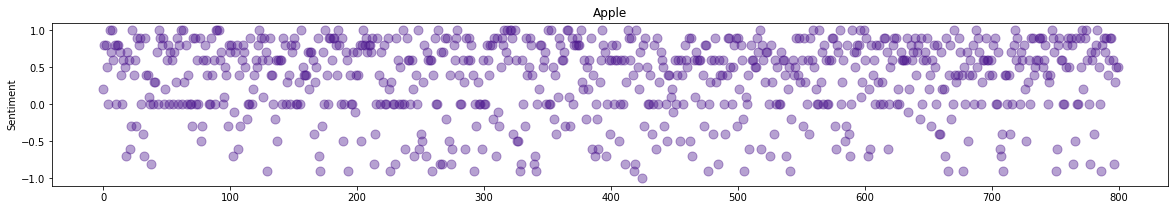

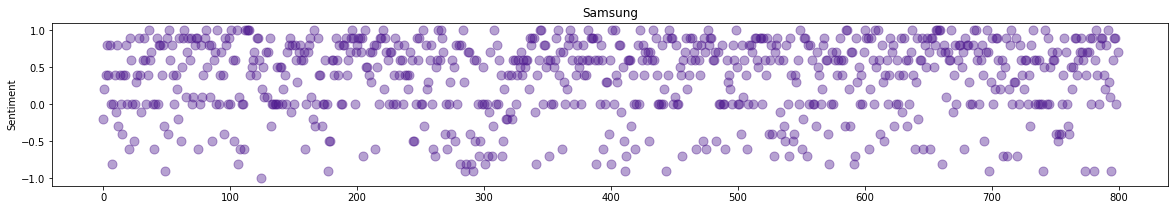

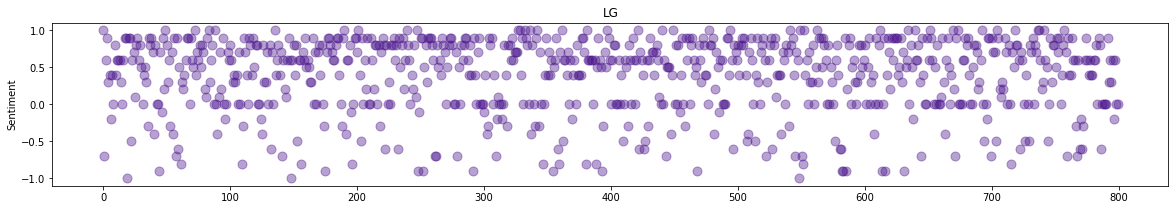

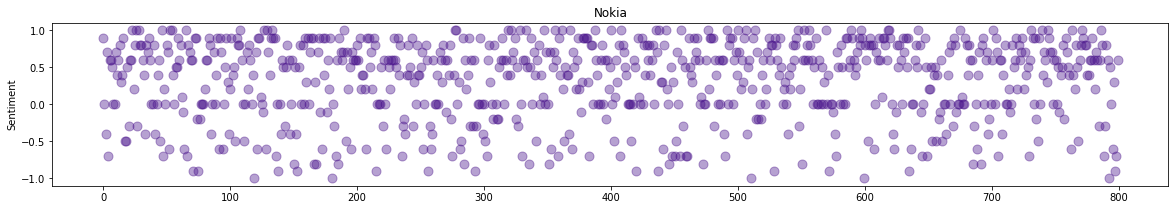

In [0]:
for i in range(0,len(list_of_brands)):
    plot_brand(list_of_brands[i],name_of_brands[i])

**Observation :**
Sentiment concentration towards positivity decreases as we move from top to lower brands.

---

Population towards negativity and neutrality keeps on increasing as we move downwards.*

**References** 

https://data.world/promptcloud/amazon-mobile-phone-reviews

http://www.rroij.com/open-access/text-mining-concepts-process-and-applications-36-39.pdf

http://blog.aylien.com/10-common-nlp-terms-explained-for-the-text/

https://machinelearningmastery.com/gentle-introduction-bag-words-model/

http://textminingonline.com/dive-into-nltk-part-i-getting-started-with-nltk

https://stackoverflow.com/questions/1833252/java-stanford-nlp-part-of-speech-labels